In [2]:
import csv

with open('C:/Users/al797/Desktop/Crashes.csv', mode='r') as file:
    reader = csv.DictReader(file)
    crashes = [row for row in reader]

In [3]:
crashes

[{'RD_NO': 'JC113649',
  'CRASH_DATE': '01/12/2019 12:01:00 AM',
  'POSTED_SPEED_LIMIT': '30',
  'TRAFFIC_CONTROL_DEVICE': 'NO CONTROLS',
  'DEVICE_CONDITION': 'NO CONTROLS',
  'WEATHER_CONDITION': 'CLEAR',
  'LIGHTING_CONDITION': 'DARKNESS, LIGHTED ROAD',
  'FIRST_CRASH_TYPE': 'PARKED MOTOR VEHICLE',
  'TRAFFICWAY_TYPE': 'NOT DIVIDED',
  'ALIGNMENT': 'STRAIGHT AND LEVEL',
  'ROADWAY_SURFACE_COND': 'DRY',
  'ROAD_DEFECT': 'NO DEFECTS',
  'REPORT_TYPE': 'ON SCENE',
  'CRASH_TYPE': 'NO INJURY / DRIVE AWAY',
  'DATE_POLICE_NOTIFIED': '01/12/2019 12:01:00 AM',
  'PRIM_CONTRIBUTORY_CAUSE': 'UNABLE TO DETERMINE',
  'SEC_CONTRIBUTORY_CAUSE': 'UNABLE TO DETERMINE',
  'STREET_NO': '734',
  'STREET_DIRECTION': 'N',
  'STREET_NAME': 'CENTRAL PARK AVE',
  'BEAT_OF_OCCURRENCE': '1112.0',
  'NUM_UNITS': '6.0',
  'MOST_SEVERE_INJURY': 'NO INDICATION OF INJURY',
  'INJURIES_TOTAL': '0.0',
  'INJURIES_FATAL': '0.0',
  'INJURIES_INCAPACITATING': '0.0',
  'INJURIES_NON_INCAPACITATING': '0.0',
  'INJURIES

In [4]:
def print_rows_with_null_unit_type(ds):
    null_values = [None, "", "null", "none", "nan"]
    
    null_rows = [record for record in crashes if record.get("LOCATION", "").strip().lower() in null_values]
    
    if null_rows:
        print("Righe con 'unit type' nullo:")
        for row in null_rows:
            print(row)
    else:
        print("Non ci sono righe con 'unit type' nullo.")

        
print_rows_with_null_unit_type(crashes)

Righe con 'unit type' nullo:
{'RD_NO': 'JC111300', 'CRASH_DATE': '01/10/2019 06:45:00 AM', 'POSTED_SPEED_LIMIT': '30', 'TRAFFIC_CONTROL_DEVICE': 'TRAFFIC SIGNAL', 'DEVICE_CONDITION': 'FUNCTIONING PROPERLY', 'WEATHER_CONDITION': 'CLEAR', 'LIGHTING_CONDITION': 'DAYLIGHT', 'FIRST_CRASH_TYPE': 'SIDESWIPE SAME DIRECTION', 'TRAFFICWAY_TYPE': 'NOT DIVIDED', 'ALIGNMENT': 'STRAIGHT AND LEVEL', 'ROADWAY_SURFACE_COND': 'DRY', 'ROAD_DEFECT': 'NO DEFECTS', 'REPORT_TYPE': 'NOT ON SCENE (DESK REPORT)', 'CRASH_TYPE': 'NO INJURY / DRIVE AWAY', 'DATE_POLICE_NOTIFIED': '01/10/2019 07:50:00 AM', 'PRIM_CONTRIBUTORY_CAUSE': 'IMPROPER LANE USAGE', 'SEC_CONTRIBUTORY_CAUSE': 'NOT APPLICABLE', 'STREET_NO': '342', 'STREET_DIRECTION': 'N', 'STREET_NAME': 'LOWER COLUMBUS DR', 'BEAT_OF_OCCURRENCE': '114.0', 'NUM_UNITS': '2.0', 'MOST_SEVERE_INJURY': 'NO INDICATION OF INJURY', 'INJURIES_TOTAL': '0.0', 'INJURIES_FATAL': '0.0', 'INJURIES_INCAPACITATING': '0.0', 'INJURIES_NON_INCAPACITATING': '0.0', 'INJURIES_REPORTED_N

In [5]:
def replace_nulls(ds, column_name, replacement_value):
    for record in ds:
        if record[column_name] and record[column_name].strip().lower() in ["", "null", "none", "nan"]:
            record[column_name] = replacement_value
        elif not record[column_name]:  
            record[column_name] = replacement_value


In [6]:
def replace_nulls_with_conditions(ds, column_name_to_check, target_value, column_to_replace, replacement_value):
    for record in ds:
        # Controlla se la condizione è soddisfatta
        if record.get(column_name_to_check) == target_value and (not record.get(column_to_replace) or record[column_to_replace] in ["", "null", "none", "NaN"]):
            record[column_to_replace] = replacement_value


In [7]:
def remove_rows_with_nulls(data, attribute):
    
    data[:] = [record for record in data if record.get(attribute) not in [None, "", float("nan")]]


In [10]:
def mv_count(variable):
    count = 0 
    for record in crashes:
        if not record[variable]:
            count += 1
    return count

# STREET NAME

la riga che ha missing value in STREET_NAME presenta molti altri null values, ad esempio per gli attributi di latitude, longitude, location, street direction, perciò diventa impossibile risalilre al nome della strada. abbiamo quindi decciso di eliminarla

In [11]:
mv_count('STREET_NAME')

1

In [12]:
replace_nulls(crashes, 'STREET_NAME', '76TH ST')

In [13]:
mv_count('STREET_NAME')

0

# MOST SEVERE INJURY

In [10]:
mv_count('MOST_SEVERE_INJURY')

7


In [11]:
replace_nulls(crashes, 'MOST_SEVERE_INJURY', 'NO INDICATION OF INJURY')

In [12]:
mv_count('MOST_SEVERE_INJURY')

0


# REPORT TYPE

In [13]:
mv_count('REPORT_TYPE')

4996


There is no way to know which is the report type. So we're keeping the null values.

# STREET DIRECTION

Le due strade che non hanno un valore nullo nella direzione hanno un solo valore possibile

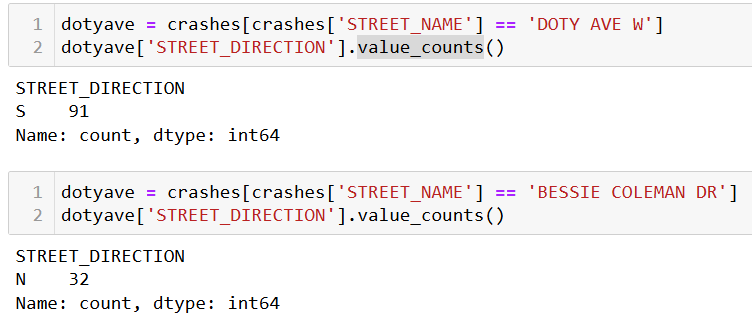

In [16]:
mv_count('STREET_DIRECTION')

2


In [43]:
replace_nulls_with_conditions(crashes, 'STREET_NAME', 'DOTY AVE W', 'STREET_DIRECTION', 'S')

In [44]:
mv_count('STREET_DIRECTION')

0


In [45]:
replace_nulls_with_conditions(crashes, 'STREET_NAME', 'BESSIE COLEMAN DR', 'STREET_DIRECTION', 'N')

In [46]:
mv_count('STREET_DIRECTION')

0


# BEAT OF OCCURRENCE 

In [47]:
mv_count('BEAT_OF_OCCURRENCE')

0


In [48]:
replace_nulls_with_conditions(crashes, 'LOCATION', 'POINT (-87.614552135332 41.780148264311)', 'BEAT_OF_OCCURRENCE', 312.0)

In [49]:
mv_count('BEAT_OF_OCCURRENCE')

0


In [50]:
replace_nulls_with_conditions(crashes, 'LOCATION', 'POINT (-87.653621088745 41.786811402722)', 'BEAT_OF_OCCURRENCE', 712.0)

In [51]:
mv_count('BEAT_OF_OCCURRENCE')

0


In [52]:
replace_nulls_with_conditions(crashes, 'LOCATION', 'POINT (-87.713896783814 41.994542305274)', 'BEAT_OF_OCCURRENCE', 1711.0)

In [53]:
mv_count('BEAT_OF_OCCURRENCE')

0


In [28]:
replace_nulls_with_conditions(crashes, 'STREET_NAME', 'BESSIE COLEMAN DR', 'BEAT_OF_OCCURRENCE', 1654.0 )

In [29]:
mv_count('BEAT_OF_OCCURRENCE')

0


# LATITUDE, LONGITUDE AND LOCATION

In [30]:
mv_count('LATITUDE')

1022


In [31]:
#!pip install geocoder

In [32]:
from geopy.geocoders import Nominatim
import time

# Configura il geolocalizzatore
geolocator = Nominatim(user_agent="incident_locator")

# Funzione per ottenere latitudine, longitudine e indirizzo completo
def get_lat_lon_location(street_no, street_direction, street_name):
    try:
        # Crea l'indirizzo come stringa
        address = f"{street_no} {street_direction} {street_name}, Chicago, IL"
        location = geolocator.geocode(address, timeout=10)
        if location:
            return location.latitude, location.longitude, location.address
    except Exception as e:
        print(f"Errore con l'indirizzo {address}: {e}")
    return None, None, None

# Itera sui record e sostituisce i valori mancanti
for crash in crashes:
    if not crash.get('LATITUDE') or not crash.get('LONGITUDE') or not crash.get('LOCATION'):
        lat, lon, loc = get_lat_lon_location(crash['STREET_NO'], crash['STREET_DIRECTION'], crash['STREET_NAME'])
        if lat and lon:
            # Aggiorna i valori
            crash['LATITUDE'] = lat
            crash['LONGITUDE'] = lon
            crash['LOCATION'] = loc

        # Pausa per evitare limiti di richiesta
        time.sleep(1)

# Risultato finale dopo aver riempito i valori
print(crashes[:5])  # Mostra i primi 5 record per confermare l'aggiornamento


[{'RD_NO': 'JC113649', 'CRASH_DATE': '01/12/2019 12:01:00 AM', 'POSTED_SPEED_LIMIT': '30', 'TRAFFIC_CONTROL_DEVICE': 'NO CONTROLS', 'DEVICE_CONDITION': 'NO CONTROLS', 'WEATHER_CONDITION': 'CLEAR', 'LIGHTING_CONDITION': 'DARKNESS, LIGHTED ROAD', 'FIRST_CRASH_TYPE': 'PARKED MOTOR VEHICLE', 'TRAFFICWAY_TYPE': 'NOT DIVIDED', 'ALIGNMENT': 'STRAIGHT AND LEVEL', 'ROADWAY_SURFACE_COND': 'DRY', 'ROAD_DEFECT': 'NO DEFECTS', 'REPORT_TYPE': 'ON SCENE', 'CRASH_TYPE': 'NO INJURY / DRIVE AWAY', 'DATE_POLICE_NOTIFIED': '01/12/2019 12:01:00 AM', 'PRIM_CONTRIBUTORY_CAUSE': 'UNABLE TO DETERMINE', 'SEC_CONTRIBUTORY_CAUSE': 'UNABLE TO DETERMINE', 'STREET_NO': '734', 'STREET_DIRECTION': 'N', 'STREET_NAME': 'CENTRAL PARK AVE', 'BEAT_OF_OCCURRENCE': '1112.0', 'NUM_UNITS': '6.0', 'MOST_SEVERE_INJURY': 'NO INDICATION OF INJURY', 'INJURIES_TOTAL': '0.0', 'INJURIES_FATAL': '0.0', 'INJURIES_INCAPACITATING': '0.0', 'INJURIES_NON_INCAPACITATING': '0.0', 'INJURIES_REPORTED_NOT_EVIDENT': '0.0', 'INJURIES_NO_INDICATION

In [33]:
mv_count('LATITUDE')

308


###### Per i null values che con GeoPy non siamo riusciti a fillare, , abbiamo creato con pandas un dizionario che, per ogni strada che non ha lat e log, calcola la media di latitudine e longitudine per i record riferiti alla stessa strada che hanno la location.
##### Alcune strade non hanno altri record che presentano la location, perciò andremo ad eliminarle

In [34]:
street_mean_coordinates = {
    
    'CHICAGO SKYWAY OB': {'latitude': 41.74227883457143, 'longitude': -87.57590929792856},
    'CHICAGO SKYWAY IB': {'latitude': 41.74227353683332, 'longitude': -87.57654492987038},
    'OHARE ST': {'latitude': 41.97620113900001, 'longitude': -87.90530912500004},
    'KENNEDY EXPY IB': {'latitude': 41.9445149038, 'longitude': -87.74905055459999},
    'MC FETRIDGE DR': {'latitude': 41.865043402551734, 'longitude': -87.6173671586207},
    'RANDOLPH SUB ST': {'latitude': 41.884592989666665, 'longitude': -87.62160521266667},
    'LA SALLE DR': {'latitude': 41.90103851500532, 'longitude': -87.63245768456915},
    'MANNHEIM RD': {'latitude': 41.98863609599999, 'longitude': -87.8821597974},
    'SOUTH WATER RAMP': {'latitude': 41.886845844999996, 'longitude': -87.621254377},
    'KENNEDY EXPY OB': {'latitude': 41.953580825, 'longitude': -87.7301759305},
    '87TH ST': {'latitude': 41.73621988185685, 'longitude': -87.6337419882137},
    'KEDVALE AVE': {'latitude': 41.87563567062, 'longitude': -87.72905901827599},
    'LAKE SHORE DR NB': {'latitude': 41.899861723909424, 'longitude': -87.62224080009368},
    'LAKE LOWER ST': {'latitude': 41.885688421, 'longitude': -87.62097238825},
    'DOTY AVE E': {'latitude': 41.691178218063584, 'longitude': -87.59287764128324},
    'WACKER SUB DR': {'latitude': 41.888183762, 'longitude': -87.622614368}
}


In [35]:
for street_name, coordinates in street_mean_coordinates.items():
    latitude = coordinates['latitude']
    longitude = coordinates['longitude']
    
    replace_nulls_with_conditions(crashes, 'STREET_NAME', street_name, 'LATITUDE', latitude)
    
    replace_nulls_with_conditions(crashes, 'STREET_NAME', street_name, 'LONGITUDE', longitude)
    
    location_value = f"POINT({latitude} {longitude})"
    
    replace_nulls_with_conditions(crashes, 'STREET_NAME', street_name, 'LOCATION', location_value)

In [36]:
mv_count('LATITUDE')

150


In [37]:
def print_rows_with_null_unit_type(ds):
    # Identifica i valori considerati come nulli
    null_values = [None, " ", "null", "none", "nan", "NaN", ""]
    
    # Filtra le righe con 'unit type' nullo
    null_rows = [record for record in ds if record.get("LOCATION").strip().lower() in null_values]
    
    # Stampa le righe con 'unit type' nullo
    if null_rows:
        print("Righe con 'unit type' nullo:")
        for row in null_rows:
            print(row)
    else:
        print("Non ci sono righe con 'unit type' nullo.")

# Chiamata della funzione sul tuo dataset
print_rows_with_null_unit_type(crashes)


Righe con 'unit type' nullo:
{'RD_NO': 'JC106096', 'CRASH_DATE': '01/05/2019 05:40:00 PM', 'POSTED_SPEED_LIMIT': '30', 'TRAFFIC_CONTROL_DEVICE': 'TRAFFIC SIGNAL', 'DEVICE_CONDITION': 'FUNCTIONING PROPERLY', 'WEATHER_CONDITION': 'CLEAR', 'LIGHTING_CONDITION': 'DARKNESS, LIGHTED ROAD', 'FIRST_CRASH_TYPE': 'TURNING', 'TRAFFICWAY_TYPE': 'ONE-WAY', 'ALIGNMENT': 'STRAIGHT AND LEVEL', 'ROADWAY_SURFACE_COND': 'DRY', 'ROAD_DEFECT': 'NO DEFECTS', 'REPORT_TYPE': 'ON SCENE', 'CRASH_TYPE': 'NO INJURY / DRIVE AWAY', 'DATE_POLICE_NOTIFIED': '01/05/2019 05:45:00 PM', 'PRIM_CONTRIBUTORY_CAUSE': 'IMPROPER TURNING/NO SIGNAL', 'SEC_CONTRIBUTORY_CAUSE': 'DISREGARDING ROAD MARKINGS', 'STREET_NO': '2', 'STREET_DIRECTION': 'W', 'STREET_NAME': 'I190 EXPY', 'BEAT_OF_OCCURRENCE': '1654.0', 'NUM_UNITS': '2.0', 'MOST_SEVERE_INJURY': 'NO INDICATION OF INJURY', 'INJURIES_TOTAL': '0.0', 'INJURIES_FATAL': '0.0', 'INJURIES_INCAPACITATING': '0.0', 'INJURIES_NON_INCAPACITATING': '0.0', 'INJURIES_REPORTED_NOT_EVIDENT': '0

In [40]:
mv_count('LATITUDE')

0


# SALVO FILE

In [55]:
import csv

fieldnames = crashes[0].keys()

with open('C:/Users/al797/Desktop/Crashes_cleaned.csv', mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(crashes)
